# Statistical Learning Homework 3

## 12112627 李乐平

**ISLR 10.7.3**

In this problem, you will perform K-means clustering manually, with K = 2, on a small example with n = 6 observations and p = 2 features. The observations are as follows.

In [1]:
# Obs.- 1 2 3 4 5 6

# X1--- 1 1 0 5 6 4

# X2--- 4 3 4 1 2 0

(a). Plot the observations.

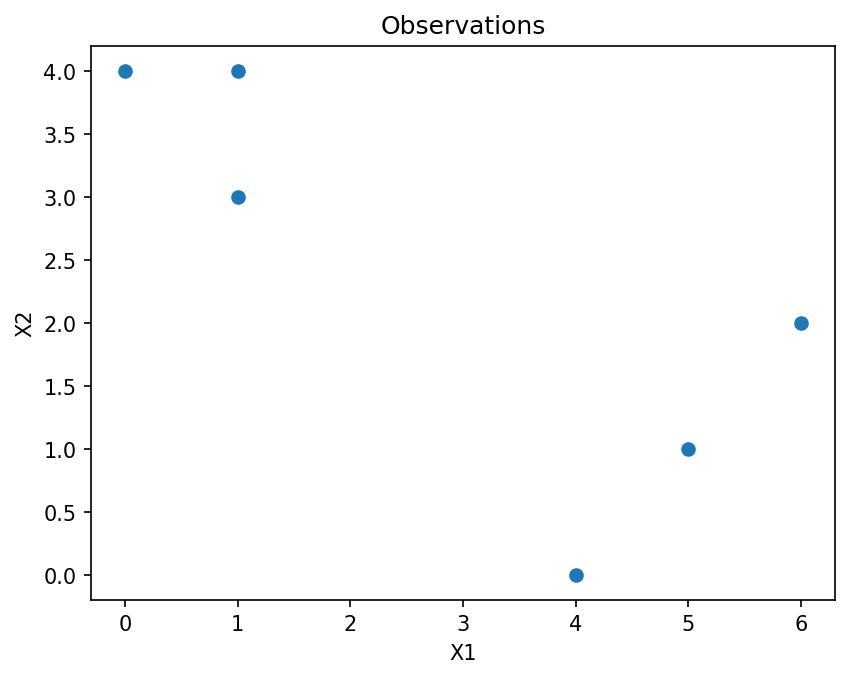

In [2]:
import numpy as np
import matplotlib.pyplot as plt

data = np.array([[1, 4], [1, 3], [0, 4], [5, 1], [6, 2], [4, 0]])
plt.figure(dpi = 150)
plt.scatter(data[:, 0], data[:, 1])
plt.title('Observations')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

(b). Randomly assign a cluster label to each observation.

In [3]:
np.random.seed(114514)
labels = np.random.choice([0, 1], size = len(data))
print("Random initial cluster labels :", labels)

Random initial cluster labels : [1 1 1 1 0 1]


(c). Compute the centroid for each cluster.

In [4]:
def compute_centroids(data, labels):
    centroids = []
    for cluster in np.unique(labels):
        cluster_points = data[labels == cluster]
        centroid = np.mean(cluster_points, axis = 0)
        centroids.append(centroid)
    return np.array(centroids)

(d). Assign each observation to the centroid to which it is closest, in terms of Euclidean distance. Report the cluster labels for each observation.

In [5]:
def assign_to_centroids(data, centroids):
    labels = np.argmin(np.linalg.norm(data[:, np.newaxis] - centroids, axis = 2), axis = 1)
    return labels

(e). Repeat (c) and (d) until the answers obtained stop changing.

In [6]:
while True:
    old_labels = labels.copy()
    
    # Step (c)
    centroids = compute_centroids(data, labels)
    
    # Step (d)
    labels = assign_to_centroids(data, centroids)
    
    # Step (e)
    if np.array_equal(old_labels, labels):
        break
        
print("Final cluster labels:", labels)
print("Final centroids:\n", centroids)

Final cluster labels: [1 1 1 0 0 0]
Final centroids:
 [[5.         1.        ]
 [0.66666667 3.66666667]]


(f). In your plot from (a), color the observations according to the cluster labels obtained.

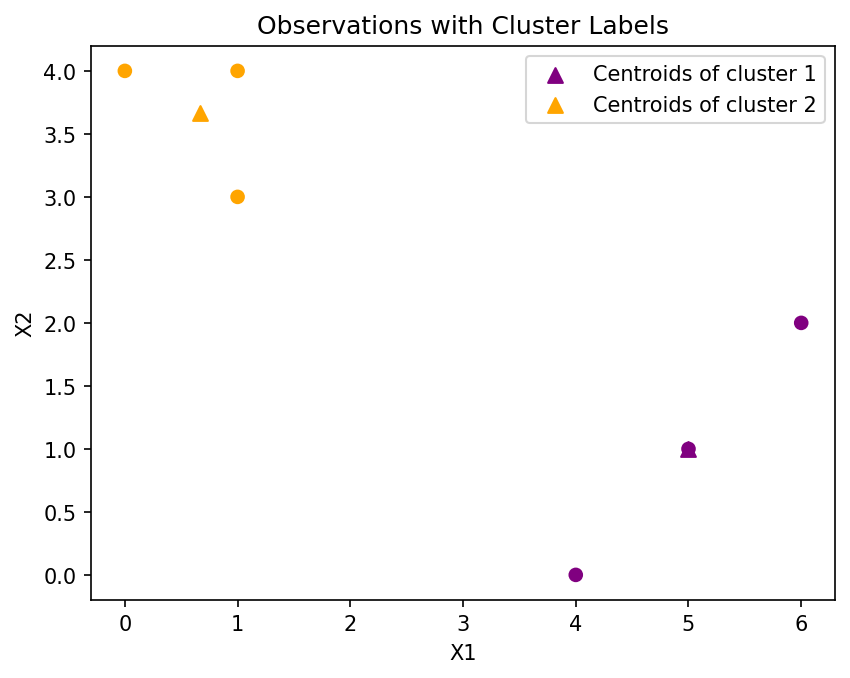

In [23]:
label_colors = ['purple', 'orange']

plt.figure(dpi = 150)
plt.scatter(data[:, 0], data[:, 1], c = [label_colors[label] for label in labels])
plt.scatter(
    centroids[0, 0], centroids[0, 1], 
    c = [label_colors[0]], marker = '^', s = 50, label = 'Centroids of cluster 1'
)
plt.scatter(
    centroids[1, 0], centroids[1, 1], 
    c = [label_colors[1]], marker = '^', s = 50, label = 'Centroids of cluster 2'
)
plt.title('Observations with Cluster Labels')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()

**ISLR 10.11**

On the book website, www.StatLearning.com, there is a gene expression data set (Ch10Ex11.csv) that consists of 40 tissue samples with measurements on 1,000 genes. The first 20 samples are from healthy patients, while the second 20 are from a diseased group.

(a). Load the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform
from sklearn.decomposition import PCA

data = pd.read_csv("Ch10Ex11.csv", header = None)
print(data.head())

         0         1         2         3         4         5         6   \
0 -0.961933  0.441803 -0.975005  1.417504  0.818815  0.316294 -0.024967   
1 -0.292526 -1.139267  0.195837 -1.281121 -0.251439  2.511997 -0.922206   
2  0.258788 -0.972845  0.588486 -0.800258 -1.820398 -2.058924 -0.064764   
3 -1.152132 -2.213168 -0.861525  0.630925  0.951772 -1.165724 -0.391559   
4  0.195783  0.593306  0.282992  0.247147  1.978668 -0.871018 -0.989715   

         7         8         9   ...        30        31        32        33  \
0 -0.063966  0.031497 -0.350311  ... -0.509591 -0.216725 -0.055506 -0.484449   
1  0.059543 -1.409645 -0.656712  ...  1.700708  0.007290  0.099062  0.563853   
2  1.592124 -0.173117 -0.121087  ... -0.615472  0.009999  0.945810 -0.318521   
3  1.063619 -0.350009 -1.489058  ... -0.284277  0.198946 -0.091833  0.349628   
4 -1.032253 -1.109654 -0.385142  ... -0.692998 -0.845707 -0.177497 -0.166491   

         34        35        36        37        38        39  
0 -0

(b). Apply hierarchical clustering to the samples using correlation-based distance, and plot the dendrogram. Do the genes separate the samples into the 2 groups? Do your results depend on the type of linkage used?

**Solution:**

The following shows the performances of different linkage methods. As we can see below, only when linkage_method = "ward" is used, the genes distinctly separate the samples into 2 groups.

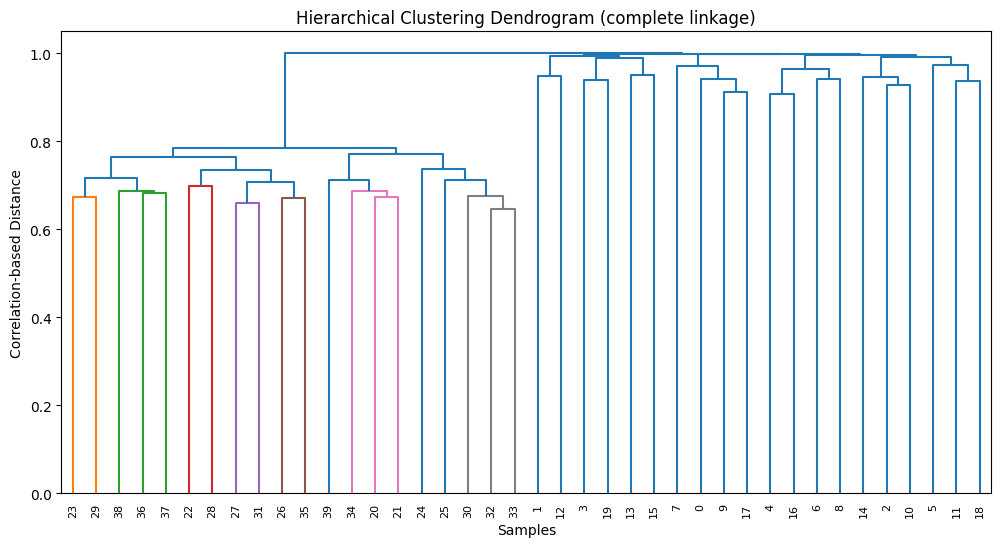

In [30]:
distance_matrix = 1 - np.abs(data.corr())

condensed_distance = squareform(distance_matrix)

linkage_method = "complete"
dendrogram = hierarchy.linkage(condensed_distance, method = linkage_method)
plt.figure(figsize = (12, 6))
hierarchy.dendrogram(dendrogram, labels = data.columns, leaf_rotation = 90)
plt.title(f"Hierarchical Clustering Dendrogram ({linkage_method} linkage)")
plt.xlabel("Samples")
plt.ylabel("Correlation-based Distance")
plt.show()

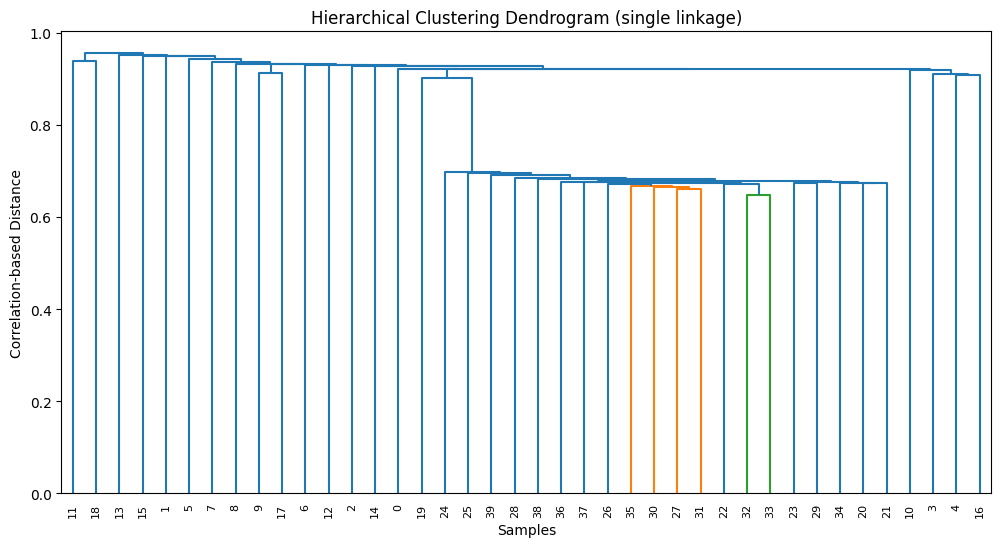

In [32]:
linkage_method = "single"
dendrogram = hierarchy.linkage(condensed_distance, method=linkage_method)
plt.figure(figsize=(12, 6))
hierarchy.dendrogram(dendrogram, labels = data.columns, leaf_rotation = 90)
plt.title(f"Hierarchical Clustering Dendrogram ({linkage_method} linkage)")
plt.xlabel("Samples")
plt.ylabel("Correlation-based Distance")
plt.show()

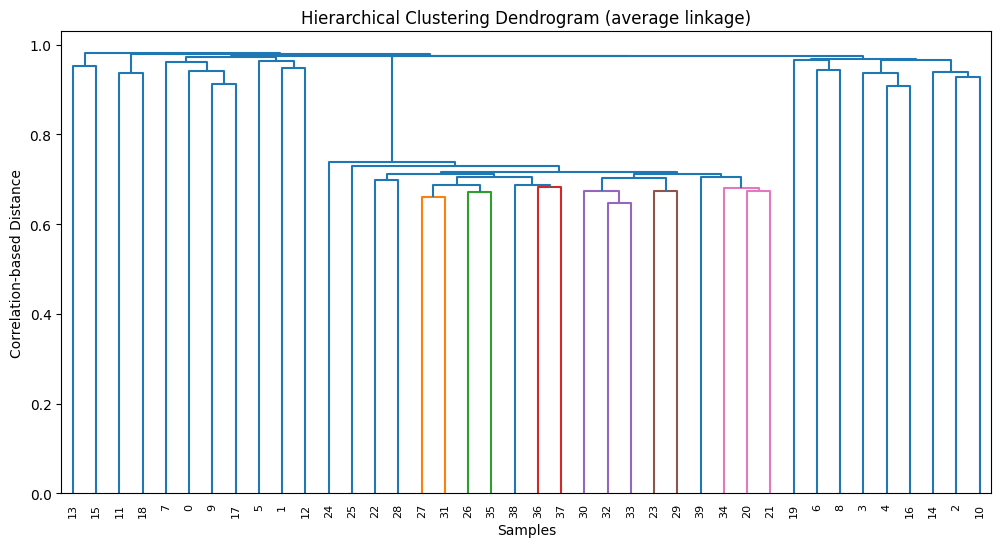

In [33]:
linkage_method = "average"
dendrogram = hierarchy.linkage(condensed_distance, method=linkage_method)
plt.figure(figsize=(12, 6))
hierarchy.dendrogram(dendrogram, labels = data.columns, leaf_rotation = 90)
plt.title(f"Hierarchical Clustering Dendrogram ({linkage_method} linkage)")
plt.xlabel("Samples")
plt.ylabel("Correlation-based Distance")
plt.show()

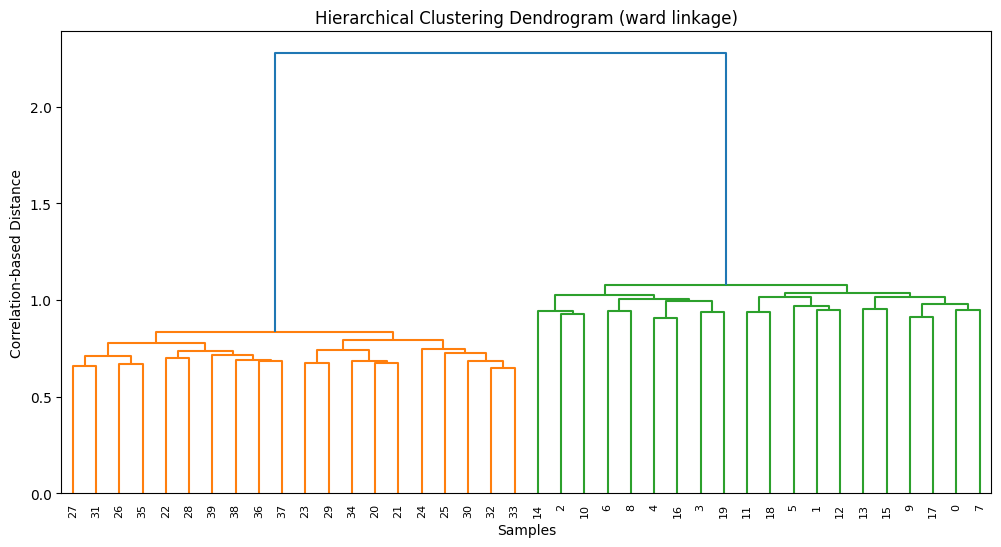

In [34]:
linkage_method = "ward"
dendrogram = hierarchy.linkage(condensed_distance, method=linkage_method)
plt.figure(figsize=(12, 6))
hierarchy.dendrogram(dendrogram, labels = data.columns, leaf_rotation = 90)
plt.title(f"Hierarchical Clustering Dendrogram ({linkage_method} linkage)")
plt.xlabel("Samples")
plt.ylabel("Correlation-based Distance")
plt.show()

(c). Your collaborator wants to know which genes differ the most across the two groups. Suggest a way to answer this question, and apply it here.

**Solution:**

We begin by splitting the data into two groups representing the healthy and diseased conditions. Subsequently, we compute the absolute mean difference for each gene between these two groups, providing a quantitative measure of gene expression dissimilarity. By sorting these difference values in descending order, we identify genes with the most substantial differences between the two conditions. The final step involves presenting the top-ranking genes, typically the top 10 in this case, which are likely to play a crucial role in distinguishing between the healthy and diseased states. 

In [31]:
healthy_data = data.iloc[:, :20]
diseased_data = data.iloc[:, 20:]

gene_diff_means = np.abs(healthy_data.mean(axis = 1) - diseased_data.mean(axis = 1))

sorted_genes = gene_diff_means.sort_values(ascending = False)

top_genes = sorted_genes.head(10)
print("Top 10 Genes with the Highest Difference in Means:")
print(top_genes)

Top 10 Genes with the Highest Difference in Means:
599    2.747577
583    2.601985
548    2.550757
539    2.545174
501    2.544461
567    2.519418
581    2.496084
564    2.470820
561    2.465549
553    2.436718
dtype: float64
